In [1]:
%pip install interpretdl
%pip install paddleclas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 459.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 1.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.8/344.8 kB 1.1 MB/s eta 0:

In [1]:
import cv2 as cv
import os
import paddle
import paddleclas

class GOALS2022Dataset(paddle.io.Dataset):
    def __init__(self, mode):
        self.mode = mode
        if mode == "Train":
            self.lbound = 1
            self.rbound = 100
        elif mode == "Validation":
            self.lbound = 101
            self.rbound = 200

    def __getitem__(self, i):
        if os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 0
        elif os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 1
        else:
            raise FileNotFoundError

    def __len__(self):
        return self.rbound - self.lbound + 1


train_data = GOALS2022Dataset("Train")
eval_data = GOALS2022Dataset("Validation")
#model = paddle.Model(paddle.vision.models.vgg11(num_classes=2))
model = paddle.Model(paddleclas.ViT_small_patch16_224(class_num=2))
'''model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy(),
)
model.fit(train_data, batch_size=32, epochs=100, verbose=1)
model.evaluate(eval_data)'''
model.load('ViT_small_patch16_224')
#model.summary()

2022-11-10 17:23:38 INFO: Loading faiss with AVX2 support.
2022-11-10 17:23:38 INFO: Could not load library with AVX2 support due to:
ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")
2022-11-10 17:23:38 INFO: Loading faiss.
2022-11-10 17:23:38 INFO: Successfully loaded faiss.
W1110 17:23:38.518131 16587 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1110 17:23:38.521519 16587 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


In [12]:
for i in model.network.named_sublayers():
    print(i)

('patch_embed', PatchEmbed(
  (proj): Conv2D(3, 768, kernel_size=[16, 16], stride=[16, 16], data_format=NCHW)
))
('patch_embed.proj', Conv2D(3, 768, kernel_size=[16, 16], stride=[16, 16], data_format=NCHW))
('pos_drop', Dropout(p=0.0, axis=None, mode=upscale_in_train))
('blocks', LayerList(
  (0): Block(
    (norm1): LayerNorm(normalized_shape=[768], epsilon=1e-05)
    (attn): Attention(
      (qkv): Linear(in_features=768, out_features=2304, dtype=float32)
      (attn_drop): Dropout(p=0.0, axis=None, mode=upscale_in_train)
      (proj): Linear(in_features=768, out_features=768, dtype=float32)
      (proj_drop): Dropout(p=0.0, axis=None, mode=upscale_in_train)
    )
    (drop_path): Identity()
    (norm2): LayerNorm(normalized_shape=[768], epsilon=1e-05)
    (mlp): Mlp(
      (fc1): Linear(in_features=768, out_features=2304, dtype=float32)
      (act): GELU(approximate=False)
      (fc2): Linear(in_features=2304, out_features=768, dtype=float32)
      (drop): Dropout(p=0.0, axis=None, 

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/transition_attention_maps.py:31: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:523: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections

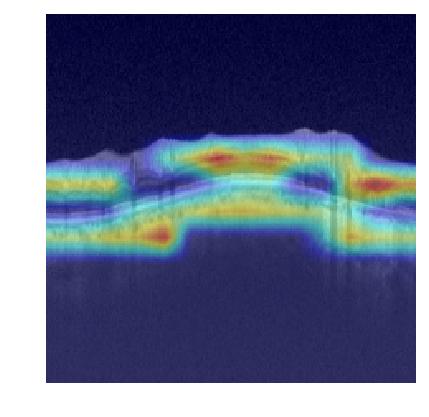

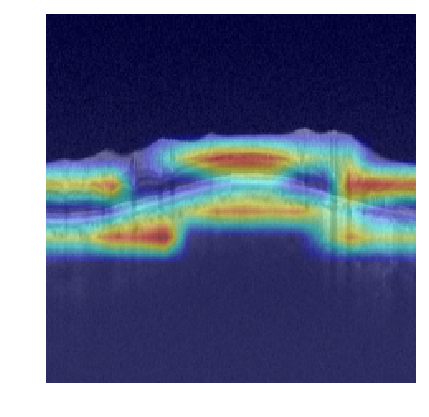

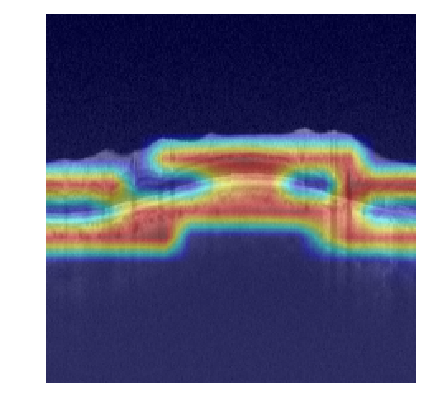

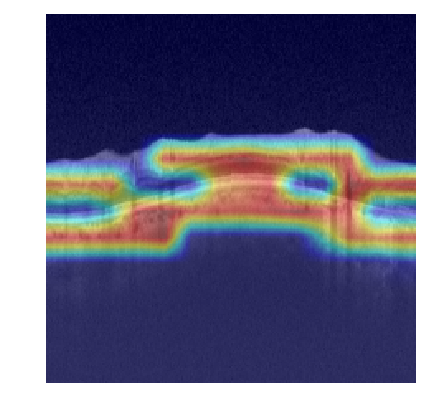

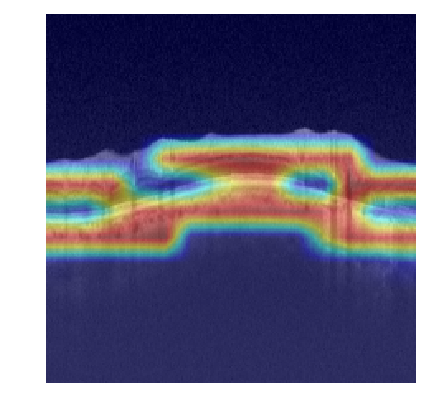

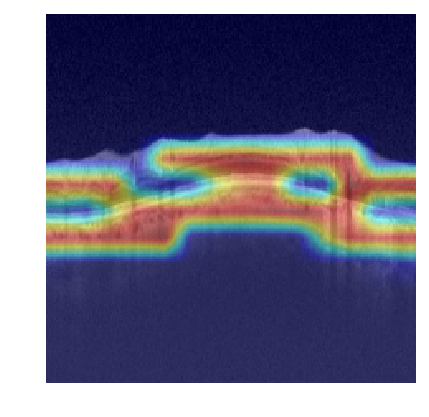

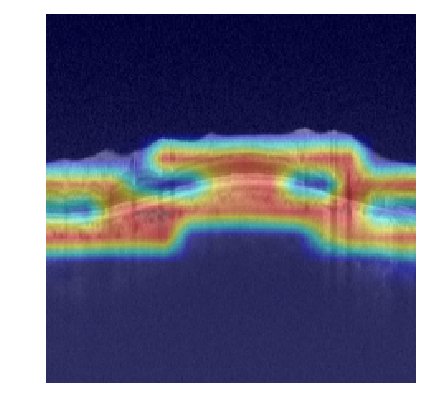

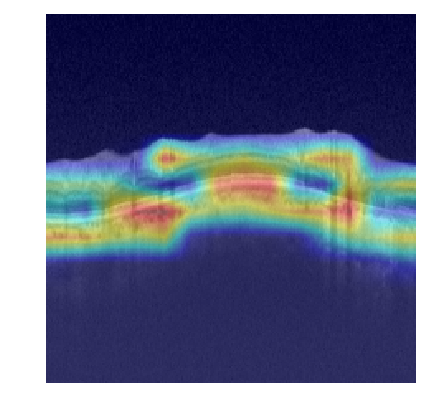

In [4]:
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
#sg = it.GradCAMInterpreter(model.network, use_cuda=True)
sg = it.TAMInterpreter(model.network, use_cuda=True)
for i in range(8):
    gradients = sg.interpret(img, start_layer=i)

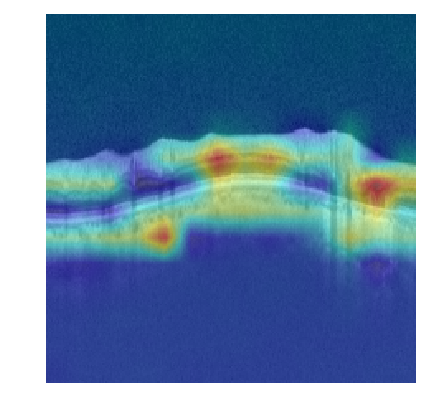

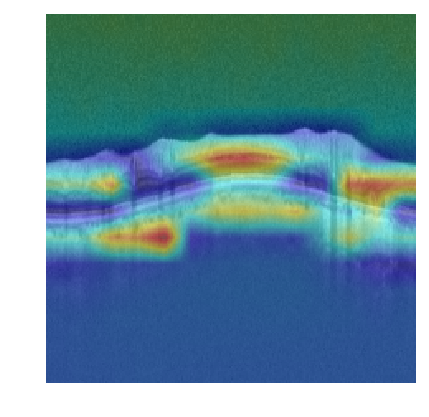

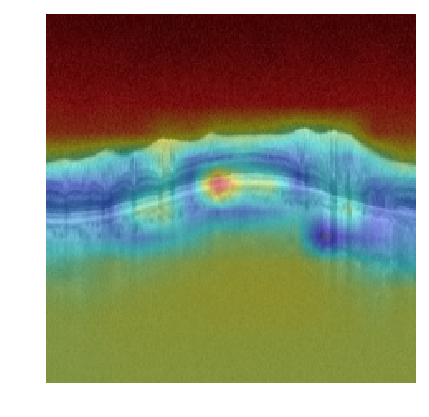

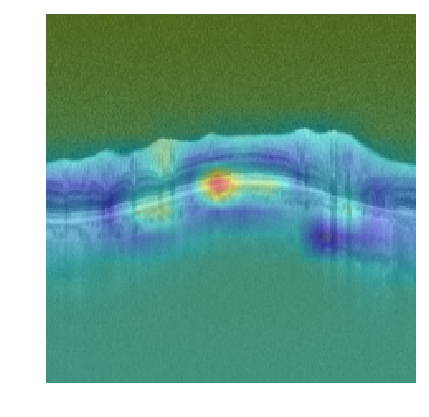

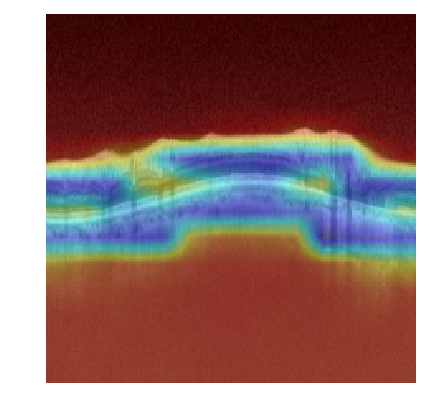

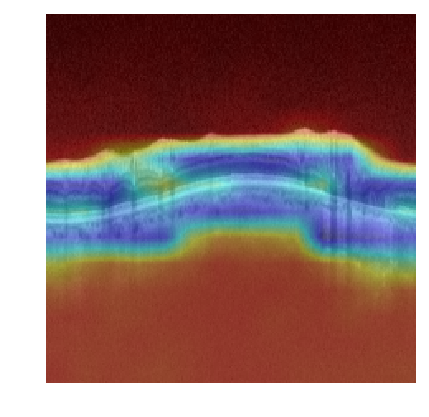

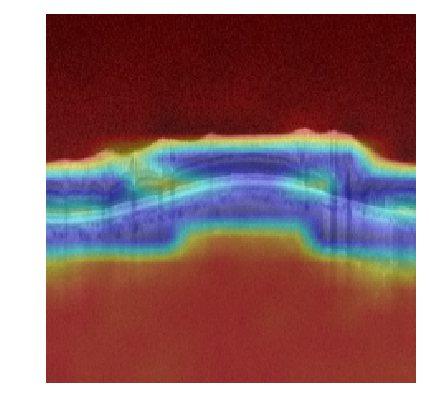

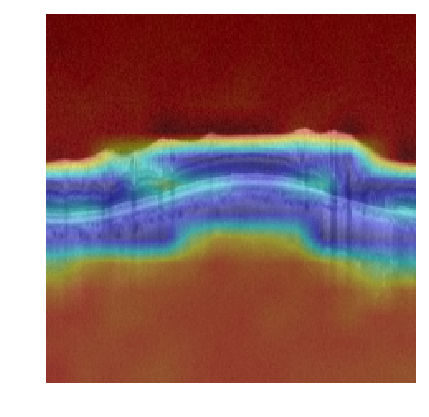

In [26]:
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
#sg = it.GradCAMInterpreter(model.network, use_cuda=True)
sg = it.RolloutInterpreter(model.network, use_cuda=True)
for i in range(8):
    gradients = sg.interpret(img, start_layer=i)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/abc_interpreter.py:112: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:523: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)


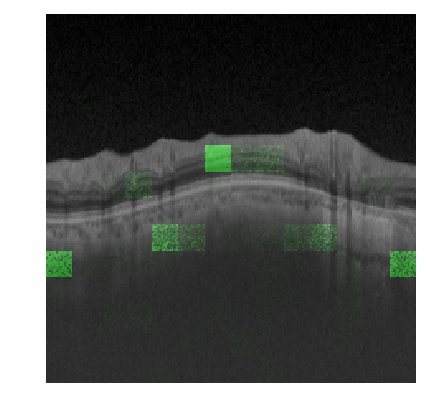

In [10]:
%matplotlib inline
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
sg = it.SmoothGradInterpreterV2(model.network, use_cuda=True)
gradients = sg.interpret(img)